In [407]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from pymongo import MongoClient
import math
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters

In [251]:
client = MongoClient()
db = client['climate-database']
collection= db['precipitation']
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'climate-database'), 'precipitation')

In [252]:
df = pd.DataFrame(collection.find({'stateansi':17,'countyansi':1},{'_id':0,'GDD':0,'KDD':0,'yield':0}))
# df.shape

In [253]:
df=df.sort_values(by=['year', 'week'])
df

,year,week,stateansi,countyansi,PRCP,TMAX,TMIN,TAVG
874,1981,1,17.0,1.0,0.000000,0.066667,-8.150000,-4.041667
875,1981,2,17.0,1.0,6.914286,-4.019048,-13.790476,-8.904762
876,1981,3,17.0,1.0,0.000000,1.433333,-10.428571,-4.497619
877,1981,4,17.0,1.0,1.257143,9.042857,-1.800000,3.621429
878,1981,5,17.0,1.0,7.542857,4.233333,-6.942857,-1.354762
...,...,...,...,...,...,...,...,...
101,2019,48,17.0,1.0,35.000000,9.500000,0.935714,4.500000
102,2019,49,17.0,1.0,1.095238,8.014286,-2.057143,3.057143
103,2019,50,17.0,1.0,3.142857,5.250000,-4.914286,0.200000
104,2019,51,17.0,1.0,3.642857,2.557143,-5.835714,-1.228571


In [254]:
no_of_states = len(df['stateansi'].unique())
no_of_counties = len(df['countyansi'].unique())
no_of_year = len(df['year'].unique())
print("States:", no_of_states, "Counties:", no_of_counties, "Years:", no_of_year)


States: 1 Counties: 1 Years: 39


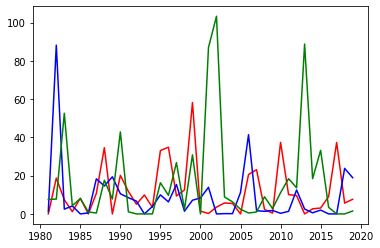

In [255]:
plt.plot(df[df.week==3].year.unique(), df[df.week==3].PRCP, color='red')
plt.plot(df[df.week==4].year.unique(), df[df.week==4].PRCP, color='blue')
plt.plot(df[df.week==5].year.unique(), df[df.week==5].PRCP, color='green')

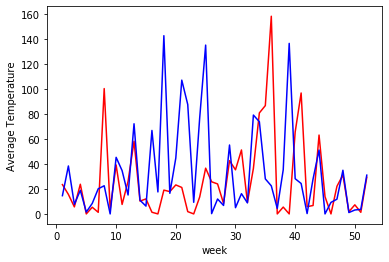

In [256]:
plt.xlabel('week')
plt.ylabel('Average Temperature')
plt.plot(df[df['year']==2018].week, df[df['year']==2018].PRCP, color="red")
plt.plot(df[df['year']==2019].week, df[df['year']==2019].PRCP, color="blue")

In [257]:
df.isna().sum()

year          0
week          0
stateansi     0
countyansi    0
PRCP          0
TMAX          0
TMIN          0
TAVG          0
dtype: int64

In [258]:
df.PRCP.replace(0, np.nan, inplace=True)

In [259]:
df[df.PRCP.isnull()]

,year,week,stateansi,countyansi,PRCP,TMAX,TMIN,TAVG
874,1981,1,17.0,1.0,NaN,0.066667,-8.150000,-4.041667
876,1981,3,17.0,1.0,NaN,1.433333,-10.428571,-4.497619
884,1981,11,17.0,1.0,NaN,12.566667,-1.523810,5.521429
907,1981,34,17.0,1.0,NaN,25.514286,13.107143,19.310714
934,1982,8,17.0,1.0,NaN,7.009524,-2.985714,2.011905
...,...,...,...,...,...,...,...,...
2016,2018,37,17.0,1.0,NaN,29.128571,15.307143,22.228571
2018,2018,39,17.0,1.0,NaN,22.778571,10.228571,16.514286
2025,2018,46,17.0,1.0,NaN,3.414286,-4.278571,-0.828571
2040,2019,9,17.0,1.0,NaN,0.850000,-9.128571,-4.114286


In [260]:
import sklearn
# import sklearn.impute.KNNImputer
from sklearn.impute import KNNImputer

In [261]:
np.array(df['PRCP']).reshape(-1,1)

array([[        nan],
       [ 6.91428571],
       [        nan],
       ...,
       [ 3.14285714],
       [ 3.64285714],
       [31.07142857]])

In [262]:
imputer = KNNImputer(n_neighbors=2)
df['PRCP'] = imputer.fit_transform(np.array(df['PRCP']).reshape(-1,1))
df.PRCP

874    29.975943
875     6.914286
876    29.975943
877     1.257143
878     7.542857
         ...    
101    35.000000
102     1.095238
103     3.142857
104     3.642857
105    31.071429
Name: PRCP, Length: 2042, dtype: float64

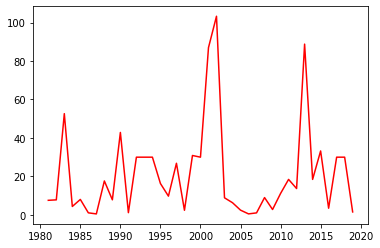

In [332]:
plt.plot(df[df.week==5].year.sort_values(), df[df.week==5].PRCP, color='red')

In [333]:
df[df.week==3].PRCP.count()

39

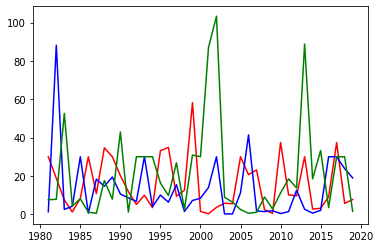

In [334]:
plt.plot(df[df.week==3].year.unique(), df[df.week==3].PRCP, color='red')
plt.plot(df[df.week==4].year.unique(), df[df.week==4].PRCP, color='blue')
plt.plot(df[df.week==5].year.unique(), df[df.week==5].PRCP, color='green')

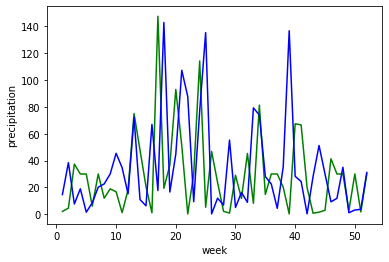

In [335]:
plt.xlabel('week')
plt.ylabel('precipitation')
plt.plot(df[df['year']==2017].week, df[df['year']==2017].PRCP, color="green")
# plt.plot(df[df['year']==2018].week, df[df['year']==2018].PRCP, color="red")
plt.plot(df[df['year']==2019].week, df[df['year']==2019].PRCP, color="blue")

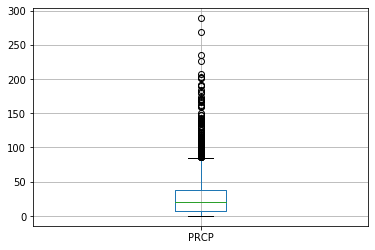

In [336]:
# n_df = df[[]]
df.boxplot(column='PRCP')

In [337]:
df['year-week'] = df['year'].astype(str) + '-' + df['week'].astype(str)
df['period'] = pd.to_datetime(df['year'].astype(str) + '-' + df['week'].astype(str)+ '0', format='%Y-%W%w')
df

,year,week,stateansi,countyansi,PRCP,TMAX,TMIN,TAVG,year-week,period
874,1981,1,17.0,1.0,29.975943,0.066667,-8.150000,-4.041667,1981-1,1981-01-11
875,1981,2,17.0,1.0,6.914286,-4.019048,-13.790476,-8.904762,1981-2,1981-01-18
876,1981,3,17.0,1.0,29.975943,1.433333,-10.428571,-4.497619,1981-3,1981-01-25
877,1981,4,17.0,1.0,1.257143,9.042857,-1.800000,3.621429,1981-4,1981-02-01
878,1981,5,17.0,1.0,7.542857,4.233333,-6.942857,-1.354762,1981-5,1981-02-08
...,...,...,...,...,...,...,...,...,...,...
101,2019,48,17.0,1.0,35.000000,9.500000,0.935714,4.500000,2019-48,2019-12-08
102,2019,49,17.0,1.0,1.095238,8.014286,-2.057143,3.057143,2019-49,2019-12-15
103,2019,50,17.0,1.0,3.142857,5.250000,-4.914286,0.200000,2019-50,2019-12-22
104,2019,51,17.0,1.0,3.642857,2.557143,-5.835714,-1.228571,2019-51,2019-12-29


In [338]:
df['PRCP']. corr(df['TAVG'])

0.2153792995555692

In [339]:
sdf=df.drop(columns=['TAVG', 'TMAX', 'TMIN','stateansi','countyansi', 'year','week','year-week'])

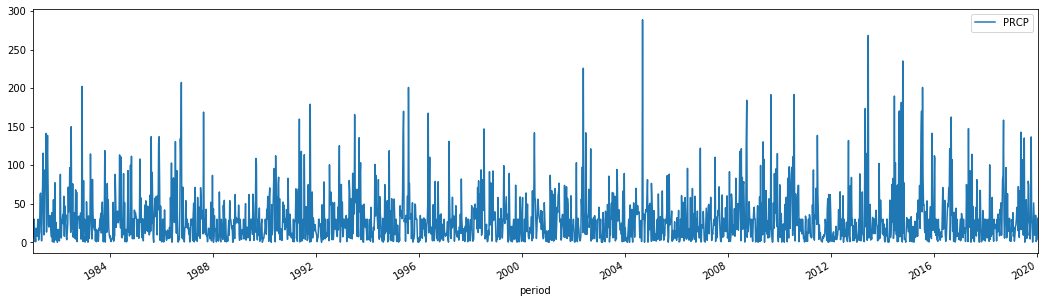

In [340]:
sdf.plot(x='period', y='PRCP',figsize=(18,5))

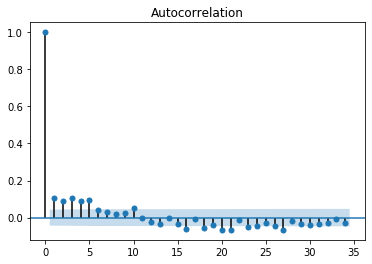

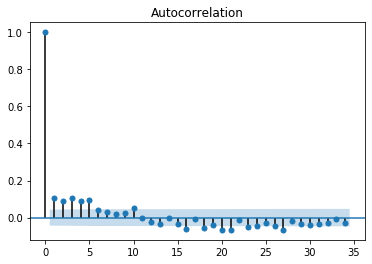

In [341]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sdf['PRCP'])

In [348]:
sdf = sdf[['period','PRCP']] 
sdf

,period,PRCP
874,1981-01-11,29.975943
875,1981-01-18,6.914286
876,1981-01-25,29.975943
877,1981-02-01,1.257143
878,1981-02-08,7.542857
...,...,...
101,2019-12-08,35.000000
102,2019-12-15,1.095238
103,2019-12-22,3.142857
104,2019-12-29,3.642857


In [351]:
# sdf.plot()

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['PRCP'])
test_result

(-15.845454888614075,
 9.583437526369727e-29,
 4,
 2037,
 {'1%': -3.433564315018763,
  '5%': -2.862959925476948,
  '10%': -2.5675259052472796},
 19775.323080736984)

In [352]:
def adfuller_test(prcp):
    result=adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
result = adfuller_test(df['PRCP'])
result

ADF Test Statistic : -15.845454888614075
p-value : 9.583437526369727e-29
#Lags Used : 4
Number of Observations Used : 2037
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [361]:
# X = sdf.PRCP
# X.size
# train = X[0:30]
# test = X[30:]
# X = sdf[]

# sdf[0:30]

In [389]:
m = ARIMA(df['PRCP'], (1,1,1)) #p,d,q

C:\Users\eisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\eisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [390]:
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.PRCP   No. Observations:                 2041
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10038.527
Method:                       css-mle   S.D. of innovations             33.040
Date:                Tue, 06 Oct 2020   AIC                          20085.053
Time:                        02:52:29   BIC                          20107.538
Sample:                             1   HQIC                         20093.301
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0009      0.001      0.625      0.532      -0.002       0.004
ar.L1.D.PRCP     0.1041      0.022      4.726      0.000       0.061       0.147
ma.L1.D.PRCP    -0.9999      0.002   -462.420      0.000      -1.004      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.6098           +0.0000j            9.6098            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [391]:
# m.geterrors()
predictions = m.predict(df['PRCP'])

In [392]:
predictions.size

2041

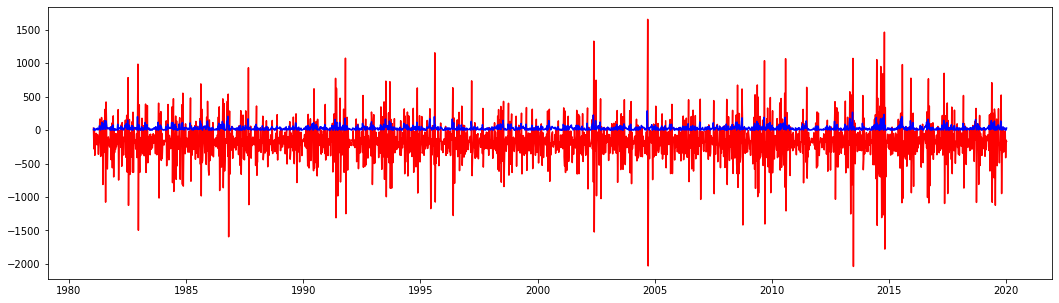

In [405]:
plt.figure(figsize=(18,5))

plt.plot(sdf['period'][1:], predictions, color='red')
plt.plot(sdf['period'][1:], sdf['PRCP'][1:], color='blue')

In [408]:
math.sqrt(mean_squared_error(sdf['PRCP'][1:], predictions))

374.4458801259999